In [3]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [7]:
import yfinance as yf
import os

# Define the tickers and date range
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Define the directory to save data
output_dir = "data"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Fetch and save data for each ticker
for ticker in tickers:
    # Download historical data for each ticker
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Save each ticker's data to a CSV file in the specified directory
    file_path = os.path.join(output_dir, f"{ticker}_historical_data.csv")
    df.to_csv(file_path)
    print(f"Data for {ticker} saved to {file_path}")

[*********************100%%**********************]  1 of 1 completed
Data for TSLA saved to data\TSLA_historical_data.csv
[*********************100%%**********************]  1 of 1 completed
Data for BND saved to data\BND_historical_data.csv
[*********************100%%**********************]  1 of 1 completed
Data for SPY saved to data\SPY_historical_data.csv


In [11]:
Tesla_df = pd.read_csv('../Data/TSLA_historical_data.csv')
Vanguard_BND_df = pd.read_csv('../Data/BND_historical_data.csv')
SPY_df = pd.read_csv('../Data/SPY_historical_data.csv')

In [9]:
Tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...,...
2469,2024-10-24,244.679993,262.119995,242.649994,260.480011,260.480011,204491900
2470,2024-10-25,256.010010,269.489990,255.320007,269.190002,269.190002,161611900
2471,2024-10-28,270.000000,273.540009,262.239990,262.510010,262.510010,107653600
2472,2024-10-29,264.510010,264.980011,255.509995,259.519989,259.519989,80521800


In [12]:
Vanguard_BND_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,82.430000,82.690002,82.419998,82.650002,63.358757,2218800
1,2015-01-05,82.739998,82.919998,82.699997,82.889999,63.542721,5820100
2,2015-01-06,83.029999,83.379997,83.029999,83.129997,63.726753,3887600
3,2015-01-07,83.139999,83.279999,83.050003,83.180000,63.765041,2433400
4,2015-01-08,83.110001,83.110001,82.970001,83.050003,63.665386,1873400
...,...,...,...,...,...,...,...
2469,2024-10-24,73.279999,73.440002,73.169998,73.309998,73.081184,6219500
2470,2024-10-25,73.480003,73.480003,73.129997,73.160004,72.931664,4641400
2471,2024-10-28,73.239998,73.279999,72.949997,73.070000,72.841942,4582800
2472,2024-10-29,72.900002,73.139999,72.790001,73.129997,72.901749,5543800


In [13]:
SPY_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,206.380005,206.880005,204.179993,205.429993,173.173767,121465900
1,2015-01-05,204.169998,204.369995,201.350006,201.720001,170.046310,169632600
2,2015-01-06,202.089996,202.720001,198.860001,199.820007,168.444687,209151400
3,2015-01-07,201.419998,202.720001,200.880005,202.309998,170.543655,125346700
4,2015-01-08,204.009995,206.160004,203.990005,205.899994,173.570038,147217800
...,...,...,...,...,...,...,...
2469,2024-10-24,579.979980,580.059998,576.570007,579.239990,579.239990,34979900
2470,2024-10-25,581.510010,584.460022,578.080017,579.039978,579.039978,47268200
2471,2024-10-28,582.580017,582.710022,580.520020,580.830017,580.830017,30174700
2472,2024-10-29,579.849976,582.909973,578.429993,581.770020,581.770020,42899700


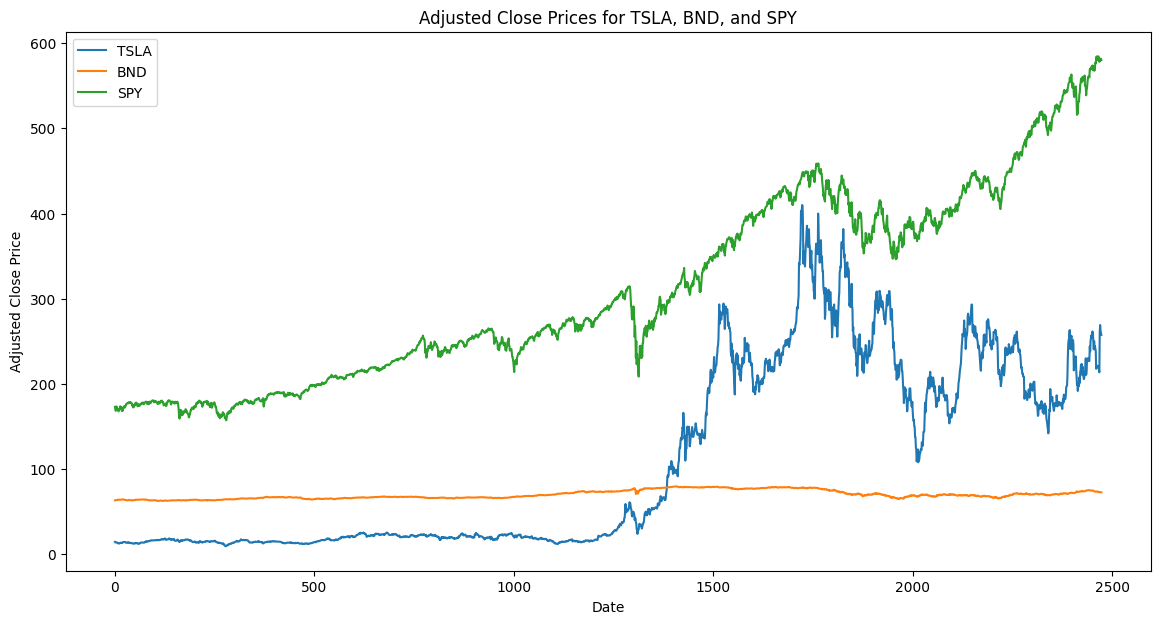

In [15]:
# Select Adjusted Close prices for each asset
prices = pd.DataFrame({
    'TSLA': Tesla_df['Adj Close'],
    'BND': Vanguard_BND_df['Adj Close'],
    'SPY': SPY_df['Adj Close']
})

# Drop rows with missing values
prices.dropna(inplace=True)

# Visualize the data
prices.plot(title="Adjusted Close Prices for TSLA, BND, and SPY", figsize=(14, 7))
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()

### Data Cleaning

In [19]:
prices.isnull().sum()  # Check for missing values
# prices.fillna(method='ffill', inplace=True)

TSLA    0
BND     0
SPY     0
dtype: int64

In [21]:
# Check Data Types
print(prices.dtypes)

TSLA    float64
BND     float64
SPY     float64
dtype: object


In [22]:
print(prices.describe())

              TSLA          BND          SPY
count  2474.000000  2474.000000  2474.000000
mean    111.438965    70.089252   310.253154
std     110.120450     4.889919   111.250655
min       9.578000    62.637585   157.328568
25%      17.066167    66.314070   214.822342
50%      25.043000    68.888931   275.812363
75%     216.865002    73.807495   402.297493
max     409.970001    79.812927   584.590027


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
prices_scaled = pd.DataFrame(scaler.fit_transform(prices), columns=prices.columns, index=prices.index)

### Exploratory Data Analysis (EDA)

#### Visualize Closing Price Trends

<Axes: title={'center': 'Adjusted Close Prices for TSLA, BND, and SPY'}>

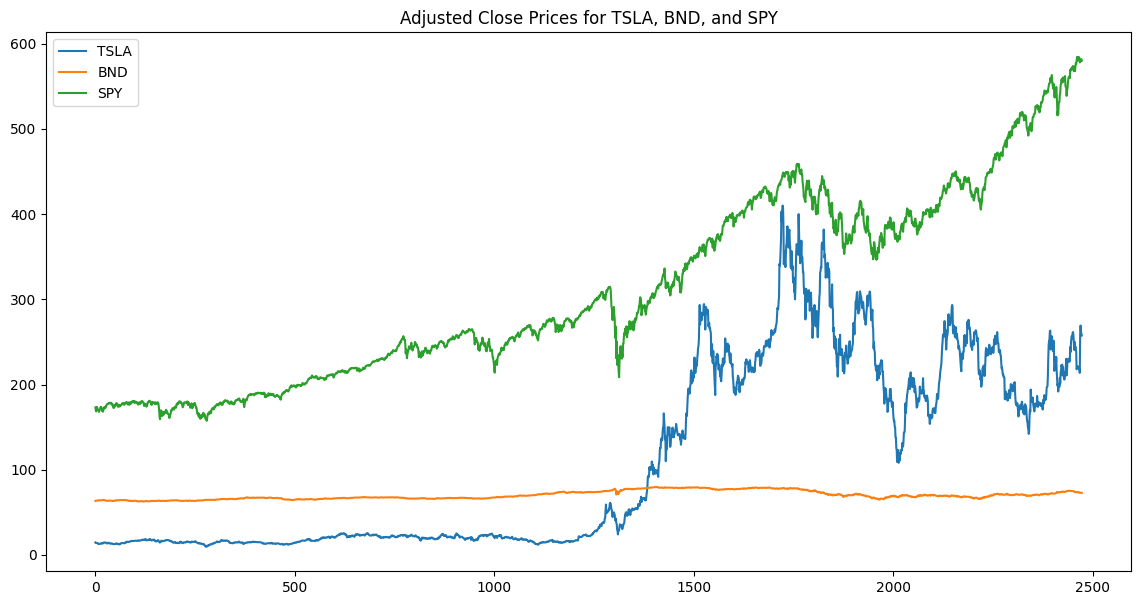

In [24]:
prices.plot(figsize=(14, 7), title="Adjusted Close Prices for TSLA, BND, and SPY")

#### Calculate Daily Percentage Change

<Axes: title={'center': 'Daily Percentage Change for TSLA, BND, and SPY'}>

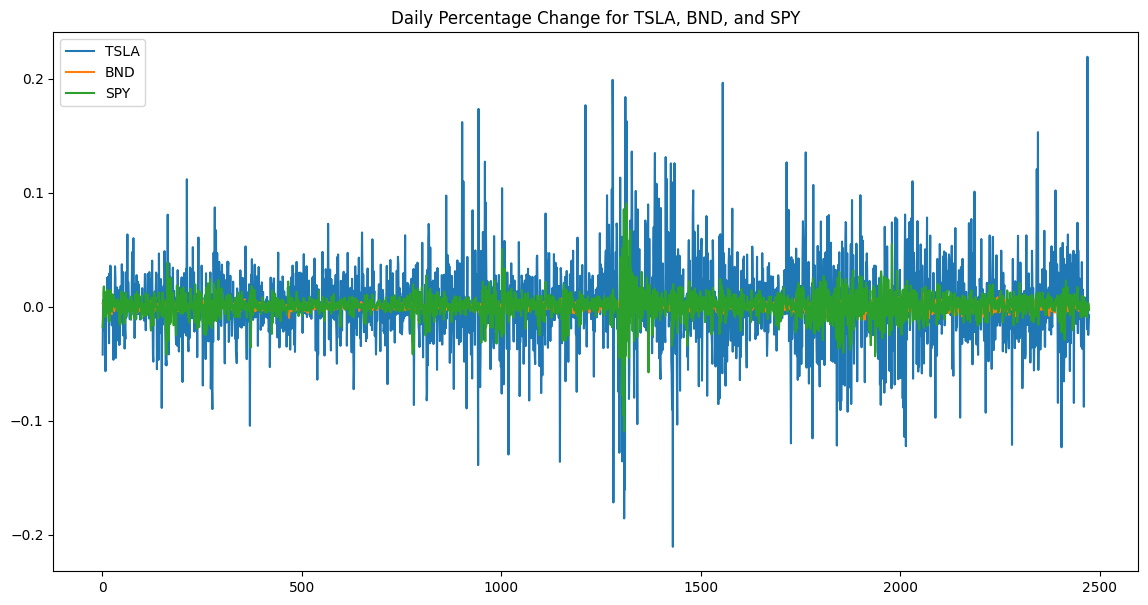

In [26]:
returns = prices.pct_change().dropna()
returns.plot(figsize=(14, 7), title="Daily Percentage Change for TSLA, BND, and SPY")

#### Analyze Volatility (Rolling Means and Standard Deviations)

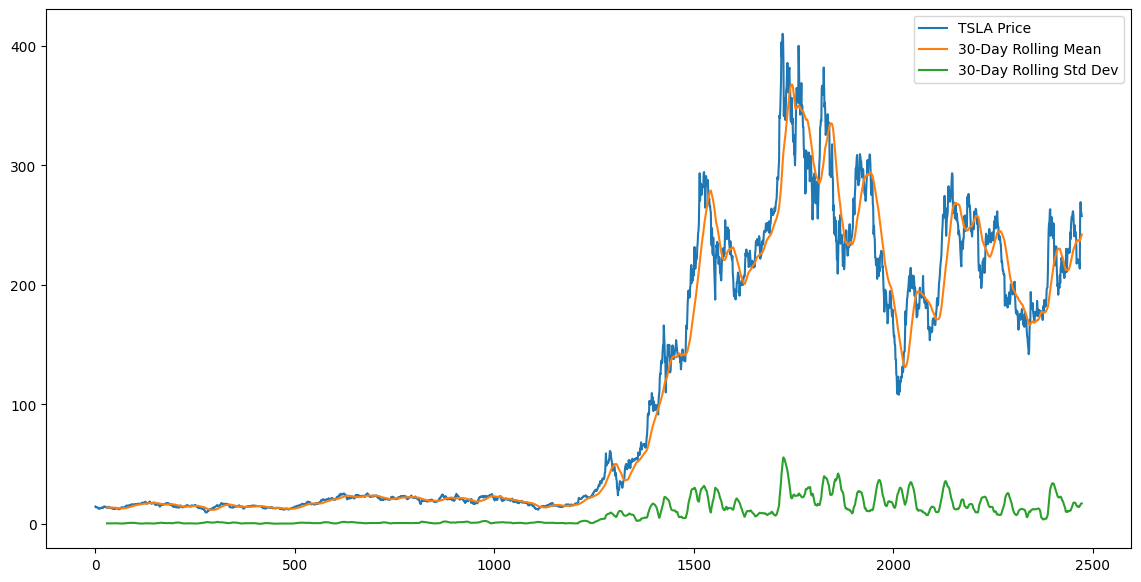

In [27]:
rolling_mean = prices['TSLA'].rolling(window=30).mean()
rolling_std = prices['TSLA'].rolling(window=30).std()

# Plot rolling metrics
prices['TSLA'].plot(label='TSLA Price', figsize=(14, 7))
rolling_mean.plot(label='30-Day Rolling Mean')
rolling_std.plot(label='30-Day Rolling Std Dev')
plt.legend()

#### Outlier Detection using Z-scores

In [28]:
import numpy as np

z_scores = (returns - returns.mean()) / returns.std()
outliers = returns[(z_scores.abs() > 3)]

#### Analyze Days with Unusual Returns

In [33]:
high_returns = returns[returns['TSLA'] > returns['TSLA'].quantile(0.95)]
low_returns = returns[returns['TSLA'] < returns['TSLA'].quantile(0.05)]
print(f"Low returns \n{low_returns}\n High returns\n {high_returns}")

Low returns 
          TSLA       BND       SPY
8    -0.056597  0.002279 -0.006037
137  -0.054879  0.001848 -0.003951
149  -0.088846  0.000614 -0.008188
161  -0.051567 -0.000244 -0.042107
201  -0.066068 -0.001584 -0.001278
...        ...       ...       ...
2404 -0.123346 -0.002889 -0.022662
2410 -0.065541  0.003738 -0.014161
2425 -0.056479 -0.004015 -0.007849
2435 -0.084459  0.001201 -0.016830
2460 -0.087825  0.000136  0.005988

[124 rows x 3 columns]
 High returns
           TSLA       BND       SPY
63    0.063351  0.000839  0.006733
78    0.060065 -0.000720 -0.004158
164   0.080724  0.001351  0.024735
212   0.111735  0.000614 -0.003033
241   0.060699 -0.001113  0.014632
...        ...       ...       ...
2389  0.101973  0.002939  0.006730
2390  0.065424  0.005721  0.004463
2420  0.063363 -0.004167  0.017140
2444  0.073592  0.000000  0.017064
2469  0.219190  0.001640  0.002163

[124 rows x 3 columns]


### Seasonality and Trends

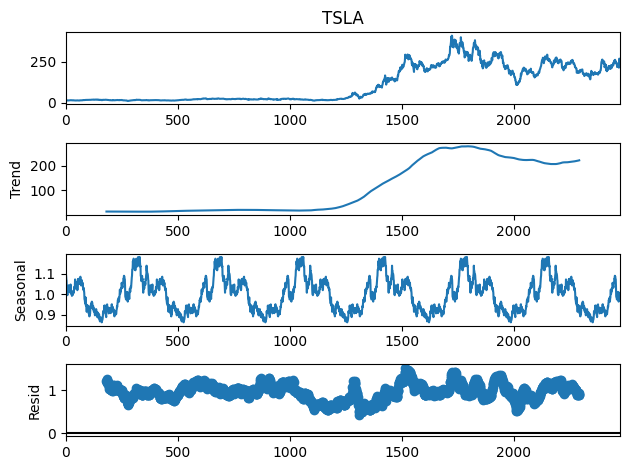

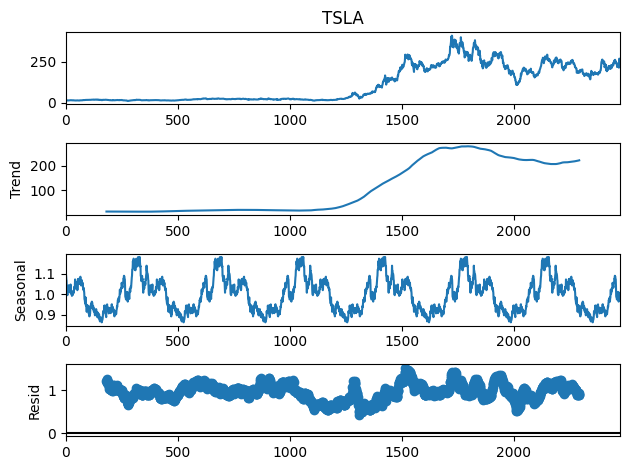

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(prices['TSLA'], model='multiplicative', period=365)
decomposition.plot()

### Analyze Volatility

<Axes: title={'center': 'TSLA Rolling 30-Day Volatility'}>

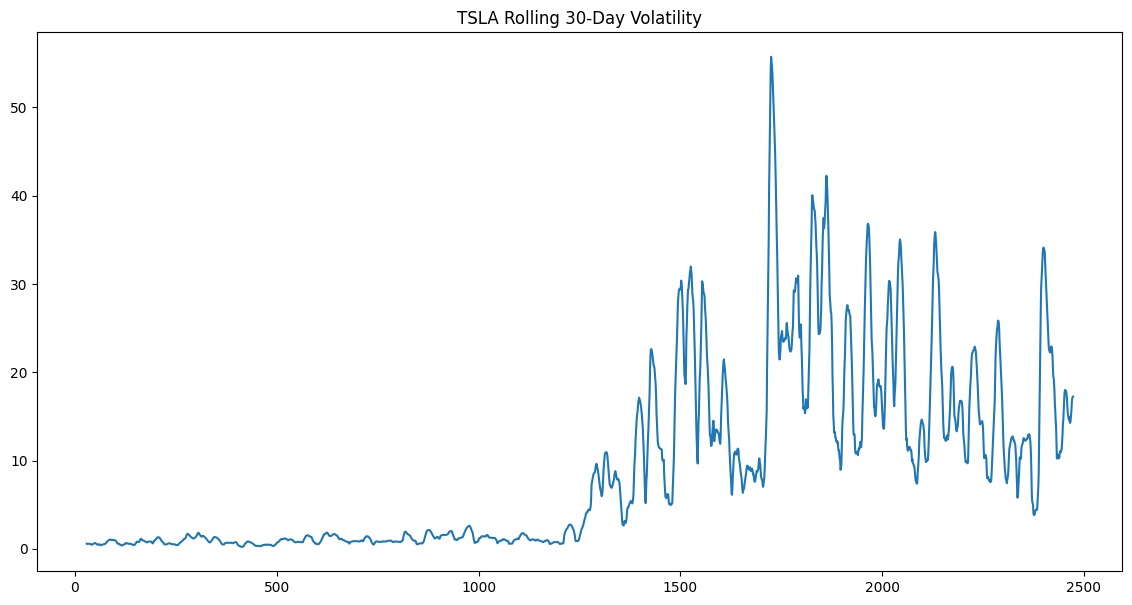

In [37]:
# Using a 30-day window for rolling standard deviation
prices['TSLA'].rolling(window=30).std().plot(title="TSLA Rolling 30-Day Volatility", figsize=(14, 7))

#### Value at Risk (VaR)

In [38]:
# Calculate the 5% VaR for Tesla’s daily returns
var_95 = returns['TSLA'].quantile(0.05)
print(f"5% VaR for TSLA: {var_95}")

5% VaR for TSLA: -0.05125703646165556


#### Sharpe Ratio

In [39]:
sharpe_ratio = returns['TSLA'].mean() / returns['TSLA'].std() * np.sqrt(252)  # Annualized
print(f"Annualized Sharpe Ratio for TSLA: {sharpe_ratio}")

Annualized Sharpe Ratio for TSLA: 0.7976895871027536
